# Proyecto - RNN
#### Huber Torres Lemus
#### Carné: 22000782

## Dataset RNN
Para esta parte del proyecto se utilizara un dataset de TWEETS.
#### FUENTE: https://raw.githubusercontent.com/haochen23/nlp-rnn-lstm-sentiment/master/training.1600000.processed.noemoticon.csv

In [1]:
import pandas as pd
import numpy as np
import spacy
import tensorflow.keras
from keras.models import Sequential
from keras.layers import InputLayer, Dense, SimpleRNN, Activation, Dropout, Conv1D, Embedding, Flatten, LSTM, GRU
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping,  ModelCheckpoint
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
nlp = spacy.load("en_core_web_md")
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import Input
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report, confusion_matrix
import itertools

C:\Users\huber\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('tweets2.txt', sep = ",")
data.head()

0           1                             2         3                4  \
0  0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  _TheSpecialOne_   
1  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
2  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
3  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
4  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   

                                                   5  
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1  is upset that he can't update his Facebook by ...  
2  @Kenichan I dived many times for the ball. Man...  
3    my whole body feels itchy and like its on fire   
4  @nationwideclass no, it's not behaving at all....

In [3]:
data.shape

(20000, 6)

In [4]:
data.isnull().any()

0    False
1    False
2    False
3    False
4    False
5    False
dtype: bool

In [5]:
# %load funciones.py

def load_glove_model(glove_file):
    print("[INFO]Cargando GloVe Model...")
    model = {}
    with open(glove_file, encoding='cp437') as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embeddings = [float(val) for val in split_line[1:]]
            model[word] = embeddings
    print("[INFO] descargado!".format(len(model)))
    return model


def remove_stopwords(sentence):
    '''
    Remover stopwords
    '''
    new = []
    # tokenizar
    sentence = nlp(sentence)
    for tk in sentence:
        if (tk.is_stop == False) & (tk.pos_ !="PUNCT"):
            new.append(tk.string.strip())
    # covertir a string
    c = " ".join(str(x) for x in new)
    return c

def lemmatize(sentence):
    '''
    lematizacion
    '''
    sentence = nlp(sentence)
    s = ""
    for w in sentence:
        s +=" "+w.lemma_
    return nlp(s)

def sent_vectorizer(sent, model):
    '''
    vectorizar
    '''
    sent_vector = np.zeros(200)
    num_w = 0
    for w in sent.split():
        try:
            # add up all token vectors to a sent_vector
            sent_vector = np.add(sent_vector, model[str(w)])
            num_w += 1
        except:
            pass
    return sent_vector



In [6]:
data_x = data[data.columns[5]].to_numpy()
data_y = data[data.columns[0]]
data_y = pd.get_dummies(data_y).to_numpy()
glove_model = load_glove_model('glove_twitter.txt')
max_vocab = 15000
max_len = 15

[INFO]Cargando GloVe Model...
[INFO] descargado!


In [7]:
glove_model

{'<user>': [0.31553,
  0.53765,
  0.10177,
  0.032553,
  0.003798,
  0.015364,
  -0.20344,
  0.33294,
  -0.20886,
  0.10061,
  0.30976,
  0.50015,
  0.32018,
  0.13537,
  0.0087039,
  0.1911,
  0.24668,
  -0.060752,
  -0.43623,
  0.019302,
  0.59972,
  0.13444,
  0.012801,
  -0.54052,
  0.27387,
  -1.182,
  -0.27677,
  0.11279,
  0.46596,
  -0.090685,
  0.24253,
  0.15654,
  -0.23618,
  0.57694,
  0.17563,
  -0.01969,
  0.018295,
  0.37569,
  -0.41984,
  0.22613,
  -0.20438,
  -0.076249,
  0.40356,
  0.61582,
  -0.10064,
  0.23318,
  0.22808,
  0.34576,
  -0.14627,
  -0.1988,
  0.033232,
  -0.84885,
  -0.25684,
  0.26369,
  0.29562,
  0.1847,
  -0.20668,
  -0.013297,
  0.12233,
  -0.47751,
  -0.17202,
  -0.14577,
  0.047446,
  -0.15824,
  0.054215,
  -0.19426,
  -0.081484,
  0.099009,
  0.10159,
  0.043571,
  0.50245,
  0.13362,
  0.065985,
  0.032969,
  -0.2017,
  -0.56905,
  -0.13203,
  0.073347,
  -0.063728,
  -0.2796,
  -0.38481,
  -0.020193,
  0.22298,
  -0.059115,
  0.045198,
  -

In [8]:
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(data_x)
sequences = tokenizer.texts_to_sequences(data_x)
word_index = tokenizer.word_index
print('tokens unicos ' + str(len(word_index)))

tokens unicos 30178


In [9]:
data_keras = pad_sequences(sequences, maxlen=max_len, padding='post')
train_X, valid_X, train_y, valid_y = train_test_split(data_keras, data_y, test_size=0.3, random_state=42)
# calculo de numero de palabras
nb_words = len(tokenizer.word_index) + 1
#matriz de palabras
embedding_matrix = np.zeros((nb_words,200))
for word, i in word_index.items():
    embedding_vector = glove_model.get(word)
    
    if(embedding_vector is not None):
#         print(embedding_vector[i])
        embedding_matrix[i] = embedding_vector
print('Palabras enmbeddings Null: ' + str(np.sum(np.sum(embedding_matrix, axis=1) == 0)) )

Palabras enmbeddings Null: 12475


In [10]:
pd.DataFrame(embedding_matrix)

0        1         2         3        4         5         6    \
0      0.000000  0.00000  0.000000  0.000000  0.00000  0.000000  0.000000   
1      0.056404  0.49536  0.184390  0.054535 -0.51751  0.135170 -0.028431   
2      0.617740  0.21046  0.526980  0.204670  0.25700 -0.217320  0.613740   
3      0.493500  0.35698  0.660680 -0.032975  0.24989  0.259360 -0.027169   
4      0.149310  0.27889  0.089979  0.408820 -0.21328  0.154060 -0.025642   
...         ...      ...       ...       ...      ...       ...       ...   
30174 -0.257690  0.86327  0.149780 -0.208400  0.68063 -0.011965 -0.500260   
30175 -0.339390  0.66990 -0.327090 -0.064070  0.44980 -0.064551 -0.216080   
30176  0.000000  0.00000  0.000000  0.000000  0.00000  0.000000  0.000000   
30177  0.000000  0.00000  0.000000  0.000000  0.00000  0.000000  0.000000   
30178  0.000000  0.00000  0.000000  0.000000  0.00000  0.000000  0.000000   

            7        8         9    ...      190      191       192      193  \
0      0.000000  0.00000  0.000000  ...  0.00000  0.00000  0.000000  0.00000   
1     -0.289410 -0.36937  0.138050  ... -0.47247 -0.23687 -0.109370 -0.23436   
2     -0.010005  0.30721 -0.102230  ...  0.15470 -0.18914  0.205680 -0.18938   
3      0.068403 -0.29063 -0.457050  ... -0.16617 -0.17018  0.112330  0.16040   
4     -0.645150 -0.71643 -0.117940  ...  0.12651  0.46811  0.496540 -0.18688   
...         ...      ...       ...  ...      ...      ...       ...      ...   
30174  0.293690  0.38337 -0.069878  ...  0.17534 -0.22947  0.088244  0.64211   
30175 -0.030639 -0.16526  0.122470  ... -0.34002  0.12227 -0.119630  0.79594   
30176  0.000000  0.00000  0.000000  ...  0.00000  0.00000  0.000000  0.00000   
30177  0.000000  0.00000  0.000000  ...  0.00000  0.00000  0.000000  0.00000   
30178  0.000000  0.00000  0.000000  ...  0.00000  0.00000  0.000000  0.00000   

            194       195       196       197      198       199  
0      0.000000  0.000000  0.000000  0.000000  0.00000  0.000000  
1     -0.753680  0.270980 -0.205150  0.635980 -0.18880 -0.035558  
2      0.033298  0.022822  0.332070 -0.011269 -0.52165  0.093783  
3     -0.171420 -0.156210 -0.113660  0.177060 -0.53695 -0.296990  
4      0.571060 -0.409080 -0.040246 -0.448210  0.31604 -0.493650  
...         ...       ...       ...       ...      ...       ...  
30174  0.254210 -0.647450  0.595010 -0.372910  0.46844 -0.517420  
30175  0.500350 -0.607460  0.789840 -0.226340  0.80519 -1.337200  
30176  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000  
30177  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000  
30178  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000  

[30179 rows x 200 columns]

In [11]:
nb_words

30179

In [12]:
if embedding_matrix is not None:
    print('primer if')
else:
    print('segundo if')

primer if


### Modelo RNN, LSTM Y GRU

In [13]:
def eleccion_modelo(nb_words, rnn_model='SimpleRNN', embedding_matrix=None):
    model = Sequential()
    #capa de incrustacion
    if embedding_matrix is not None:
        model.add(
            Embedding(
                nb_words,
                200,
                weights = [embedding_matrix],
#                 input_lenght = max_len,
                trainable = False
            )
        )
    else:
        model.add(
            Embedding(
                nb_words,
                200,
                input_lenght = max_len,
                trainable = False
            )
        )
    #Capa RNN
    if rnn_model == "SimpleRNN":
        model.add(SimpleRNN(200))
    if rnn_model == "LSTM":
        model.add(LSTM(200))
    if rnn_model == "GRU":
        model.add(GRU(200))   
    
    #Capa de activacion
    model.add(Dense(2, activation='softmax'))
    model.compile(
        loss = 'categorical_crossentropy',
        optimizer = 'adam',
        metrics = ['accuracy']
    )    
    
    return model
        

In [23]:
model_rnn = eleccion_modelo(nb_words, 'SimpleRNN', embedding_matrix)
modelCheckpoint_1 = ModelCheckpoint('rnn.hdf5', save_best_only=True)
monitor_val_acc_1 = EarlyStopping(
    monitor='val_accuracy',
    patience=5
)
history_rnn = model_rnn.fit(
    train_X, 
    train_y, 
    epochs=20, 
    batch_size=120,
    validation_data = (valid_X, valid_y),
    callbacks= [
        monitor_val_acc_1, modelCheckpoint_1
    ]
)


Epoch 1/20
117/117 [==============================] - 2s 11ms/step - loss: 0.5874 - accuracy: 0.6869 - val_loss: 0.5213 - val_accuracy: 0.7452
Epoch 2/20
117/117 [==============================] - 1s 10ms/step - loss: 0.5052 - accuracy: 0.7550 - val_loss: 0.5189 - val_accuracy: 0.7527
Epoch 3/20
117/117 [==============================] - 1s 10ms/step - loss: 0.4797 - accuracy: 0.7698 - val_loss: 0.5004 - val_accuracy: 0.7537
Epoch 4/20
117/117 [==============================] - 1s 9ms/step - loss: 0.4473 - accuracy: 0.7921 - val_loss: 0.5178 - val_accuracy: 0.7512
Epoch 5/20
117/117 [==============================] - 1s 9ms/step - loss: 0.4085 - accuracy: 0.8168 - val_loss: 0.5263 - val_accuracy: 0.7402
Epoch 6/20
117/117 [==============================] - 1s 9ms/step - loss: 0.3701 - accuracy: 0.8399 - val_loss: 0.5489 - val_accuracy: 0.7537
Epoch 7/20
117/117 [==============================] - 1s 9ms/step - loss: 0.3248 - accuracy: 0.8605 - val_loss: 0.5899 - val_accuracy: 0.7298
Epo

In [24]:
predictions_rnn = model_rnn.predict(valid_X)
predictions_rnn = predictions_rnn.argmax(axis = 1)
report_nn = classification_report(valid_y.argmax(axis=1), predictions_rnn)
print(report_nn)

188/188 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.76      0.67      0.71      3016
           1       0.70      0.79      0.74      2984

    accuracy                           0.73      6000
   macro avg       0.73      0.73      0.73      6000
weighted avg       0.73      0.73      0.73      6000



In [25]:
model_lstm = eleccion_modelo(nb_words, 'LSTM', embedding_matrix)
modelCheckpoint_2 = ModelCheckpoint('lstm.hdf5', save_best_only=True)

history_lstm = model_lstm.fit(
    train_X, 
    train_y, 
    epochs=20, 
    batch_size=120,
    validation_data = (valid_X, valid_y),
    callbacks= [
        monitor_val_acc_1, modelCheckpoint_2
    ]
)


Epoch 1/20
117/117 [==============================] - 4s 27ms/step - loss: 0.5545 - accuracy: 0.7104 - val_loss: 0.4926 - val_accuracy: 0.7708
Epoch 2/20
117/117 [==============================] - 3s 23ms/step - loss: 0.4911 - accuracy: 0.7586 - val_loss: 0.4748 - val_accuracy: 0.7753
Epoch 3/20
117/117 [==============================] - 3s 23ms/step - loss: 0.4650 - accuracy: 0.7748 - val_loss: 0.4710 - val_accuracy: 0.7760
Epoch 4/20
117/117 [==============================] - 3s 23ms/step - loss: 0.4433 - accuracy: 0.7896 - val_loss: 0.4644 - val_accuracy: 0.7825
Epoch 5/20
117/117 [==============================] - 3s 23ms/step - loss: 0.4146 - accuracy: 0.8075 - val_loss: 0.4641 - val_accuracy: 0.7813
Epoch 6/20
117/117 [==============================] - 3s 23ms/step - loss: 0.3891 - accuracy: 0.8239 - val_loss: 0.4719 - val_accuracy: 0.7783
Epoch 7/20
117/117 [==============================] - 3s 23ms/step - loss: 0.3455 - accuracy: 0.8466 - val_loss: 0.5094 - val_accuracy: 0.7767

In [26]:
predictions_lstm = model_lstm.predict(valid_X)
predictions_lstm = predictions_lstm.argmax(axis = 1)
report_lstm = classification_report(valid_y.argmax(axis=1), predictions_lstm)
print(report_lstm)

188/188 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      3016
           1       0.75      0.80      0.77      2984

    accuracy                           0.77      6000
   macro avg       0.77      0.77      0.77      6000
weighted avg       0.77      0.77      0.77      6000



In [27]:
model_gru = eleccion_modelo(nb_words, 'GRU', embedding_matrix)
modelCheckpoint_3 = ModelCheckpoint('gru.hdf5', save_best_only=True)

# model_gru.fit(
#     train_X, 
#     train_y, 
#     epochs=20, 
#     batch_size=120,
#     validation_data = (valid_X, valid_y),
#     callbacks= [
#         monitor_val_acc_1, modelCheckpoint_3
#     ]
# )
history_gru = model_gru.fit(
    train_X, 
    train_y, 
    epochs=20, 
    batch_size=120,
    validation_data = (valid_X, valid_y),
    callbacks= [
        monitor_val_acc_1, modelCheckpoint_3
    ]
)

Epoch 1/20
117/117 [==============================] - 4s 21ms/step - loss: 0.5814 - accuracy: 0.6855 - val_loss: 0.4975 - val_accuracy: 0.7593
Epoch 2/20
117/117 [==============================] - 2s 19ms/step - loss: 0.4850 - accuracy: 0.7651 - val_loss: 0.4718 - val_accuracy: 0.7775
Epoch 3/20
117/117 [==============================] - 2s 19ms/step - loss: 0.4621 - accuracy: 0.7809 - val_loss: 0.4714 - val_accuracy: 0.7737
Epoch 4/20
117/117 [==============================] - 2s 20ms/step - loss: 0.4354 - accuracy: 0.7949 - val_loss: 0.4649 - val_accuracy: 0.7790
Epoch 5/20
117/117 [==============================] - 2s 19ms/step - loss: 0.4116 - accuracy: 0.8099 - val_loss: 0.4799 - val_accuracy: 0.7797
Epoch 6/20
117/117 [==============================] - 2s 18ms/step - loss: 0.3786 - accuracy: 0.8294 - val_loss: 0.4772 - val_accuracy: 0.7793
Epoch 7/20
117/117 [==============================] - 2s 18ms/step - loss: 0.3392 - accuracy: 0.8497 - val_loss: 0.5046 - val_accuracy: 0.7637

In [28]:
predictions_gru = model_lstm.predict(valid_X)
predictions_gru = predictions_gru.argmax(axis = 1)
report_gru = classification_report(valid_y.argmax(axis=1), predictions_gru)
print(report_gru)

188/188 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      3016
           1       0.75      0.80      0.77      2984

    accuracy                           0.77      6000
   macro avg       0.77      0.77      0.77      6000
weighted avg       0.77      0.77      0.77      6000



Text(0.5, 1.0, 'Comparacion Precicion Modelos')

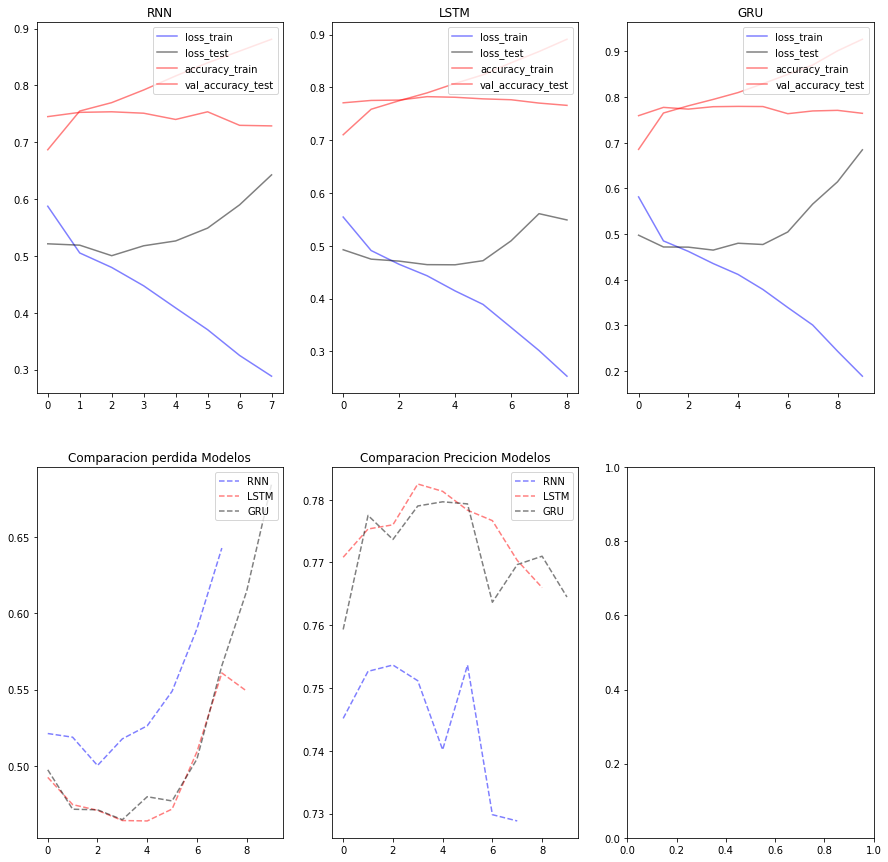

In [30]:
fig, ax = plt.subplots(2, 3, figsize = (15, 15))
### RNN
ax[0, 0].plot(history_rnn.history["loss"], color = 'blue', linestyle = '-', alpha = 0.5)
ax[0, 0].plot(history_rnn.history["val_loss"], color = 'black', linestyle = '-', alpha = 0.5)
ax[0, 0].plot(history_rnn.history["accuracy"], color = 'red', linestyle = '-', alpha = 0.5)
ax[0, 0].plot(history_rnn.history["val_accuracy"], color = 'red', linestyle = '-', alpha = 0.5)
ax[0, 0].legend(['loss_train', 'loss_test', 'accuracy_train', 'val_accuracy_test'], loc='upper right')
ax[0, 0].set_title('RNN')
### LSTM
ax[0, 1].plot(history_lstm.history["loss"], color = 'blue', linestyle = '-', alpha = 0.5)
ax[0, 1].plot(history_lstm.history["val_loss"], color = 'black', linestyle = '-', alpha = 0.5)
ax[0, 1].plot(history_lstm.history["accuracy"], color = 'red', linestyle = '-', alpha = 0.5)
ax[0, 1].plot(history_lstm.history["val_accuracy"], color = 'red', linestyle = '-', alpha = 0.5)
ax[0, 1].legend(['loss_train', 'loss_test', 'accuracy_train', 'val_accuracy_test'], loc='upper right')
ax[0, 1].set_title('LSTM')
### GRU
ax[0, 2].plot(history_gru.history["loss"], color = 'blue', linestyle = '-', alpha = 0.5)
ax[0, 2].plot(history_gru.history["val_loss"], color = 'black', linestyle = '-', alpha = 0.5)
ax[0, 2].plot(history_gru.history["accuracy"], color = 'red', linestyle = '-', alpha = 0.5)
ax[0, 2].plot(history_gru.history["val_accuracy"], color = 'red', linestyle = '-', alpha = 0.5)
ax[0, 2].legend(['loss_train', 'loss_test', 'accuracy_train', 'val_accuracy_test'], loc='upper right')
ax[0, 2].set_title('GRU')

### Comparacion de modelos loss
ax[1,0].plot(history_rnn.history['val_loss'], color = 'blue', linestyle='--', alpha = 0.5)
ax[1,0].plot(history_lstm.history['val_loss'], color = 'red', linestyle='--', alpha = 0.5)
ax[1,0].plot(history_gru.history['val_loss'], color = 'black', linestyle='--', alpha = 0.5)
ax[1,0].legend(['RNN', 'LSTM', 'GRU'], loc='upper right')
ax[1,0].set_title('Comparacion perdida Modelos')
### Comparacion de modelos accuracy
ax[1,1].plot(history_rnn.history['val_accuracy'], color = 'blue', linestyle='--', alpha = 0.5)
ax[1,1].plot(history_lstm.history['val_accuracy'], color = 'red', linestyle='--', alpha = 0.5)
ax[1,1].plot(history_gru.history['val_accuracy'], color = 'black', linestyle='--', alpha = 0.5)
ax[1,1].legend(['RNN', 'LSTM', 'GRU'], loc='upper right')
ax[1,1].set_title('Comparacion Precicion Modelos')

## Conclusion
Haciendo el analisis de resultados de los 3 modelos podemos observar que el que el mejor modelo de los 3 segun su porcentaje de precision es el LSTM con un 0.92 en entrenamiento y 0.77 en la evaluacion